### ¿Cómo funciona Python?

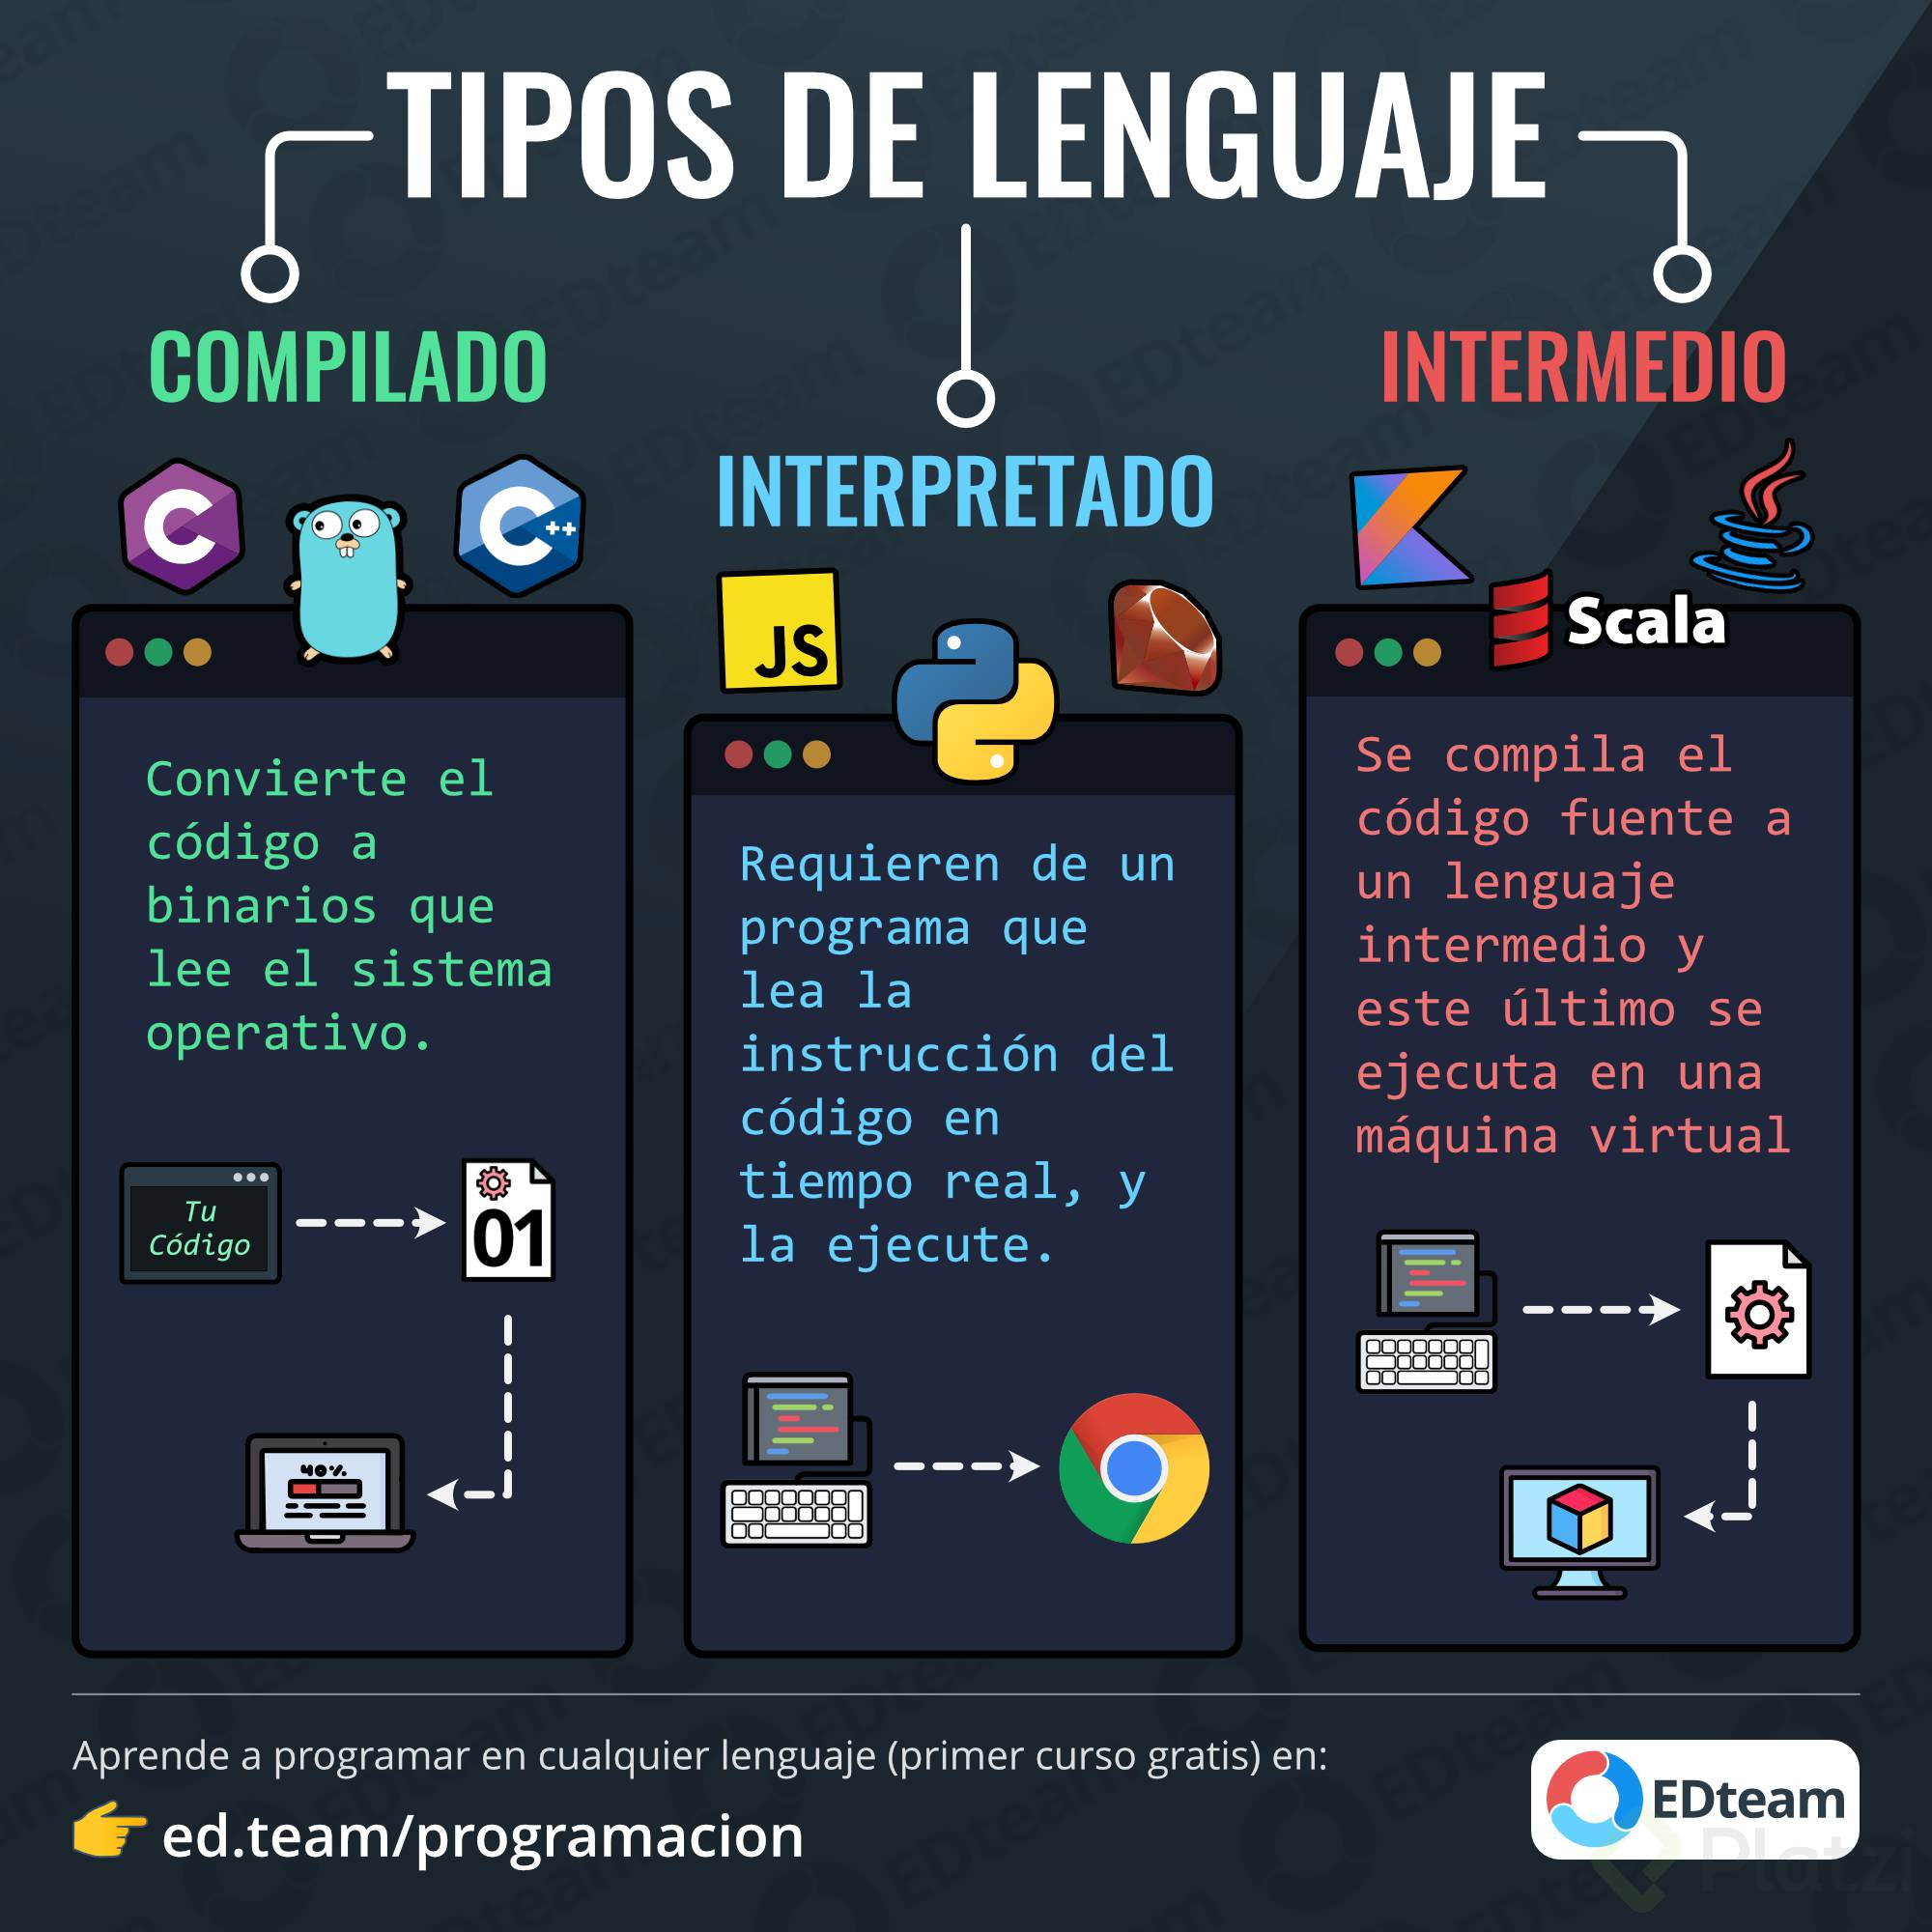

**Resumen**
Python es un lenguaje interpretado
lo que significa que tu código es transformado por el intérprete (máquina virtual de Python) a bytecode antes de ser ejecutado por un ordenador con x sistema operativo. El bytecode es un lenguaje de programación de más bajo nivel. Básicamente desde que corres tu programa hasta que la PC lo ejecuta hay una carrera de relevos de lenguajes o protocolos hasta llegar al transistor y la señal eléctrica.


Garbage collector
Recuerda que el garbage collector toma los objetos y variables que no están en uso y los elimina.


pycache
_pycache_ es el directorio (carpeta) que contiene el bytecode (el código intermedio) que crea Python para que lo pueda leer la máquina virtual. Funciona como una especie de recuperación del codigo que nosotros ya hemos trabajado, es decir para los programas que ya fueron corridos en python y convertidos a bytecode, este código se guarda a fin de que la proxima vez que corramos el programa sea más rápido.

### Modulos y paquetes

Un **módulo** es cualquier archivo de Python. Generalmente, contiene código que puedes reutilizar. Un módulo contiene funciones que se pueden exportar para que puedan estar disponibles en otro archivo. Ej modulo random para crear funciones de numeros aleatorios

Un **paquete** es un conjunto de módulos. Siempre posee el archivo __init__.py (esto es dunder init)

Un ejemplo de organizar los archivos de 🐍Python es de la siguiente manera.

#### Cómo organizar las carpetas de tus proyectos

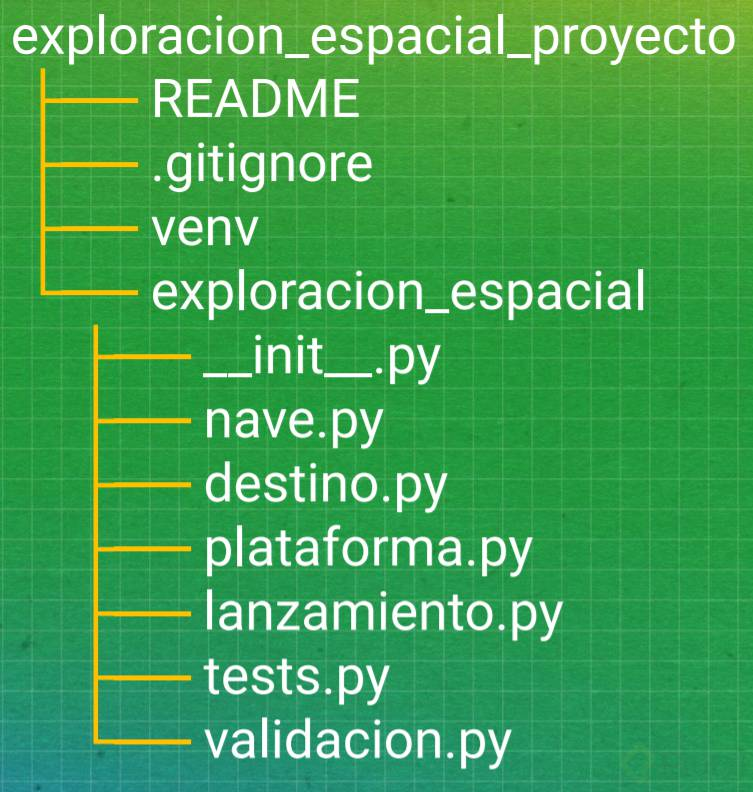

#### ¿Qué son los tipados?

Los tipados son una clasificación de los lenguajes de programación que dependen de cómo trata el lenguaje a los tipos de datos.
Existen 4 tipos:



1. Estático
2. Dinámico
3. Débil
4. Fuerte

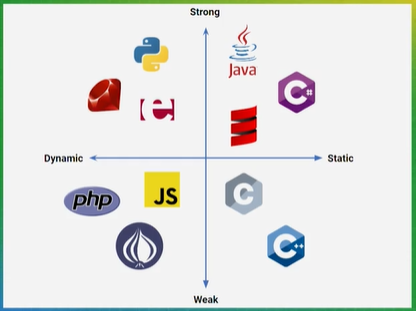 

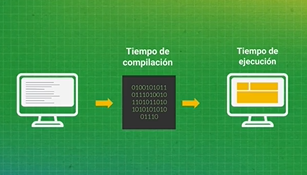

El tipado estático es el que levanta un error de tipo en el tiempo de compilación,ejemplo en JAVA:

String str = "Hello" #Variable tipo String declarada previamente
str = 5 // ERROR: no se puede convertir un tipo de dato en otro de esta forma.


El tipado dinámico es el que levanta un error de tipo en el tiempo de ejecución,ejemplo en Python:
(en python no hay tiempo de compilación sino que hay un pasaje a bytecode)


In [1]:
str = "Hello" #es un string
str = 5 #ahora es un integer... funciona

In [2]:
x = 1;
y = "2";
z = x + y; #esto es un error en Python 

# porque Python es de tipado fuerte: trata de una manera estricta las operaciones en función de los tipos de datos
# en Java Script esto daría como resultado 12 porque es un lenguaje de tipado debil, parsea los datos

TypeError: unsupported operand type(s) for +: 'int' and 'str'

### Convertir a Python de tipado dinámico a tipado estático

El hecho que Python sea un lenguaje de tipado dinámico es peligroso en el sentido de que pueden quedar errores en el código que no se detectan hasta la ejecución del programa
Una forma de solucionar esto es declarando el tipo de variables en Python.
https://docs.python.org/es/3/library/typing.html
https://mypy.readthedocs.io/en/stable/getting_started.html
Ej:


In [7]:
a = 5
print(a, type(a))

b = "Hello World"
print (b, type(b))

c = True
print (c, type(c))


5 <class 'int'>
Hello World <class 'str'>
True <class 'bool'>


In [8]:
# declarando las variables

a: int = 5
print(a)

b: str = "Hello World"
print(b)

c: bool = True
print(c)

5
Hello World
True


In [1]:
# declarando las variables en una función 
#acá estoy generando una función que tiene como parámetros a y b que son enteros
#y retorna un numero entero que es a+b

def suma(a: int, b: int) -> int:
    return a + b
print(suma(1,2))


3


In [2]:
#si en lugar de pasarle 1 y 2 como enteros los paso como string Python los concatena

def suma(a: int, b: int) -> int:
    return a + b
print(suma("1","2"))

12


In [2]:
from typing import Dict, List, Tuple #se importa de esta liberia las clases Dict y List y Tuple


In [3]:
positives: List[int] = [1,2,3,4,5] #esto es una lista en donde defino que los elementos serán enteros

users: Dict[str, int] = {    #Acá defino en mi diccionario que las keys van a ser un string y los values un entero
    "argentina": 1,
    "mexico": 34,
    "colombia": 45,
}

countries: List[Dict[str, str]] = [  #esto es una lista de diccionarios en donde tanto keys como values son strings
    {
        "name" : "Argentina",
        "people" : "45000",
    },
    {
        "name" : "México",
        "people" : "9000000",
    },
    {
        "name" : "Colombia",
        "people" : "99999999999",
    }
]
    

numbers: Tuple[int, float, int] = (1, 0.5, 1)

In [4]:
CoordinatesTypes = List[Dict[str, Tuple[int,int]]]

coodinates: CoordinatesTypes = [
    {
        "coord1": (1,2),
        "coord2": (3,5)
    },
    {
        "coord1": (0,1),
        "coord2": (2,5)
        
    },
]
    
    
#CoordinatesTypes es un alias, es el tipo de mi variable coordinates

### Modulo mypy 

Nos permite trabajar con tipos en Python y ver los errores en consola y se complementa con el módulo typing que viene a definir tipos complejos

¿cuales son las ventajas de aplicar el tipado estático en este lenguaje?

1. Nos aporta claridad y calidad al código
2. Nos va a devolver los errores antes de que el programa se ejecute, por lo tanto podremos visualizar errores que están en capas profundas de nuestro código sin necesidad de que el lenguaje sea de tipado estático de fábrica

C:\Users\Daniela\PLATZI\python_avanzado (master)
λ touch .gitignore
 (esto desde consola)
 
 Desde VS dentro de gitignore pongo la carpeta venv/
 
 Desde consola instalo mypy
 
 entro al entorno creado con avenv (el alias que cree)
 y una vez dentro instalo mypy
 pip install mypy
 
 

In [1]:
def is_palindrome(string: str) -> bool:
    string = string.replace(" ", "").lower()
    return string == string[::-1]


def run():
    print(is_palindrome(1000)) #se espera que el parametro de la función sea un string no un entero


if __name__ == "__main__":
    run()



AttributeError: 'int' object has no attribute 'replace'

python no me está marcando el error en forma clara: 'int' object has no attribute 'replace'
la forma de obtener este error es poniendo en la consola

C:\Users\Daniela\PLATZI\python_avanzado (master)
(venv) λ mypy palindrome.py --check-untyped-defs
palindrome.py:7: error: Argument 1 to "is_palindrome" has incompatible type "int"; expected "str"  [arg-type]
Found 1 error in 1 file (checked 1 source file)

In [5]:
#reto: crea un programa que verifique si un numero es primo o no con tipado estatico

"""Python module to know if a number is prime"""


def is_prime(number: int) -> bool:
    """Returns True if number is prime or False if the number is not prime"""
    results_list = [x for x in range(2, number) if number % x == 0]
    return len(results_list) == 0


def run():
    number = int(input("Escribe un número: "))
    if is_prime(number): #acá puedo obviar == True
        print(str(number) + " Es primo")
    else:
        print(str(number) +  " No es primo")


if __name__ == '__main__':
    run()

Escribe un número: 3
3 Es primo


###  Scope

El scope es el alcance que tienen las variables. Depende de donde declares o inicialices una variable para saber si tienes acceso. 
**Regla de oro: una variable solo esta disponible dentro de la region donde fue creada**

1) Local Scope
Es la región que corresponde el ámbito de una función, donde podremos tener una o mas variables, las variables van a ser accesibles únicamente en esta region y no serán visibles para otras regiones

2) Global Scope
Al escribir una o mas variables en esta region, estas podrán ser accesibles desde cualquier parte del código.

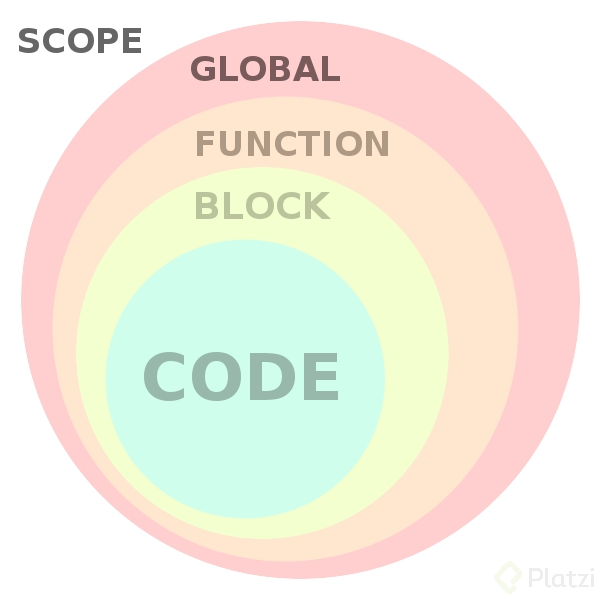

In [7]:
## ej local scope

def my_func():
    y = 5
    print(y)

my_func()

5


In [9]:
#ej global scope
y = 5

def my_func():
    print(y)
    
def my_other_func():
    print(y)

my_func()
my_other_func()

5
5


In [10]:
z = 5

def my_func():
    z = 3
    print(z)
    
my_func()
print(z)  #z son dos variables distintas con distinto scope

3
5


In [11]:
z = 5

def my_func():
    z = 3
    
    def my_other_func():
        z = 2
        print(z)

    my_other_func()
    print(z)

my_func()
print(z)

2
3
5


### Nested functions o funciones anidadas

Son funciones que se encuentran creadas dentro de otra función

In [12]:
def main():
    
    a = 1
    
    def nested():
        print(a)
        
    nested()

main()

1


### Closure

Se da cuando una variable que está en un nivel superior es recordada por una función que esta en un nivel inferior, aunque se elimine ese scope superior puedo seguir accediendo a esa variable que era recordadda por la función que está ne el nivel inferior

#### Reglas para encontrar un closure
1) Debemos tener una nested function
2) la nested function debe referenciar un valor de un scope superior
3) la función que envuelve a la nested function debe retornarla también

Los closure aparecen en dos casos particulares: cuando tenemos una clase corta (con un solo método), los usamos para que sean elegantes. El segundo caso, es cuando usamos decoradores 👀

In [ ]:
def main():
    
    a = 1
    
    def nested():
        print(a)
        
    return nested

my_func = main()
my_func()

In [13]:
def make_multiplier(x):
    
    def multiplier(n):
        return x*n
    
    return multiplier

times10 = make_multiplier(10)
times4 = make_multiplier(4)

print(times10(3)) # 30
print(times4(5)) #20
print(times10(times4(2))) # 80

30
20
80


In [1]:
# creo una función con closures que sea un repetidor

def make_repeater_of(n):
    def repeater(string):
        assert type(string) == str, "Solo puedes ingresar cadenas" # si no le paso un string me sale este error
        return string * n
    return repeater


def run():
    repeat_5 = make_repeater_of(5)
    print(repeat_5("Hola"))
    repeat_10 = make_repeater_of(10)
    print(repeat_10("Platzi"))


if __name__ == "__main__":
    run()

HolaHolaHolaHolaHola
PlatziPlatziPlatziPlatziPlatziPlatziPlatziPlatziPlatziPlatzi


reto:
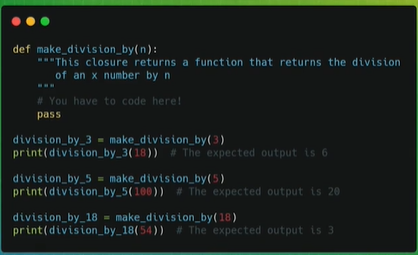

In [2]:
def make_division_by(n):
    """This closure return a function that returns the division of an x number by n"""  
    def division_by(x):
        assert type(x) == int, "Solo puedes ingresar numeros enteros"
        return x/n
    return division_by


def run():
    division_by_3 = make_division_by(3)
    print(division_by_3(18))
    division_by_5 = make_division_by(5)
    print(division_by_5(100))
    
if __name__ == "__main__":
    run()
        

6.0
20.0


### Decoradores

Un decorador también es un closure. Se define como una función que recibe como parámetro a otra función, le añade cosas y la ejecuta  y retorna una función diferente. Es decir, es una función que le añade superpoderes a otra función :)

In [3]:
def decorador(func):
    def envoltura():
        print("Esto se añade a mi función original.")
        func()
    return envoltura

def saludo():
    print("¡Hola!")

saludo()
# Salida:
# ¡Hola!

saludo = decorador(saludo) # Se guarda la función decorada en la variable saludo
saludo()                   # La función saludo está ahora decorada
# Salida:
# Esto se añade a mi función original.
# ¡Hola!

¡Hola!
Esto se añade a mi función original.
¡Hola!


**Azucar sintactica (Syntactic sugar, or syntax sugar)**: se refiere a un código embellecido para que lo veamos de una forma más estética

En el siguiente ejemplo podemos indicar que la función saludo está decorada por otra función decorador con @decorador

In [4]:
def decorador(func):
    def envoltura():
        print("Esto se añade a mi función original.")
        func()
    return envoltura

@decorador
def saludo():
    print("¡Hola!")

saludo()

Esto se añade a mi función original.
¡Hola!


In [5]:
def mayusculas(func):
    def envoltura(texto):
        return func(texto).upper()
    return envoltura

@mayusculas
def mensaje(nombre):
    return f"{nombre}, recibiste un mensaje"

print(mensaje("Daniela"))

DANIELA, RECIBISTE UN MENSAJE


In [6]:
from datetime import datetime


def execution_time(func):
    def wrapper(*args, **kwargs):
        initial_time = datetime.now()
        func(*args, **kwargs)
        final_time = datetime.now()
        time_elapsed = final_time - initial_time
        print(f'Pasaron {time_elapsed.total_seconds()} segundos')
    return wrapper


@execution_time
def random_func():
    for _ in range(1, 10000000):
        pass

@execution_time
def suma(a: int, b: int) -> int:
    return a + b

random_func()
suma(5,5)

Pasaron 0.28037 segundos
Pasaron 0.0 segundos


Cuando decoro una función que recibe parámetros como la función suma debo colocar *args, **kwargs en la función  envoltura y en func de esta manera: wrapper(*args, **kwargs) y func(*args, **kwargs) *args se refiere a argumentos posicionales y **kwargs se refiere a argumentos nombrados.  Esto indica que esta función tomará cualquier tipo de parametro que provenga de la función decorada. Recordar que cuando se decora una funcion se crea una nested function que recibe los mismos parametros que la función que estoy decorando 


### Iteradores

Un iterable es un objeto en el que se pueden recorrer todos sus elementos en un ciclo, ej strings

Los iteradores son una estructura de datos para guardar datos infinitos 

En Python lo que hace el lenguaje para poder recorrer un iterable, es convertir al iterable en un iterador a partir de una función interna llamada iter. Una vez que yo tengo el iterable convertido en iterador puedo acceder a cada uno de los elementos de los cuales partió, esto lo hago con la función next. Cuando no queden más elementos Python me devuelve un error de tipo StopIteration

In [ ]:
#creo un iterador
my_list = [1,2,3,4,5]
my_iter = iter(my_list)

#iterando un iterador
print(next(my_iter))

#de esta forma lo hago manualmente 
#¿cómo hago si son muchos elementos?

In [ ]:
#Una forma eficiente de extraer todos los elementos de un iterable
#es a partir de un ciclo while infinito... while True

#creo un iterador
my_list = [1,2,3,4,5]
my_iter = iter(my_list)

#iterando un iterador
while True:
    try:
        element = next(my_iter)
        print(element)
    except StopIteration:
        break


Un ciclo for no es más que azucar sintáctica del ciclo while infinito del ejemplo anterior. El ciclo for no existe dentro de Python sino que es un alias de este ciclo while con un try except que recorre un iterador y controla el error StopIteration

¿cómo construyo un iterador?

Protocolo de los iteradores:
Para construir un iterador tenemos que tener una clase que contenga dos métodos importantes el método __iter__ y __next__

La sucesión o serie de Fibonacci es una sucesión infinita de números naturales que comienza con los números 0 y 1; a partir de estos, «cada término es la suma de los dos anteriores»

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144...

Esta sucesión yo la puedo poner en Python completa en un iterador, ya que este me da la fórmula matematica para ir extrayendo un elemento a la vez.
Si yo quisiera guardar esta sucesión completa en una lista no se puede, pero en un iterador si.

Para crear un iterador importo primero el modulo time. Este modulo me va a permitir ajustar un tiempo de demora para observar como funciona mi iterador cuando lo ejecute
Lo segundo que voy a hacer es crear una clase llamada FiboIter, que representará a los objetos de tipo iterador que voy a instanciar posteriormente dentro del código
La clase deberá contener los dos métodos necesarios del protocolo de iterador 
__iter__
__next__
ambos recibirán a self como parámetro porque todos los métodos de una clase necesitan al parámetro self para poder existir (regla de la POO con Python)

Yo también podria tener el metodo 
__init__
que es el que me permite inicializar un objeto, en este caso puedo obviarlo porque no necesito inicializar ningún atributo

Dentro de __iter__ tengo que crear los elemntos necesarios para que el iterador funcione
Para ello necesito definir dos numeros que serán los primeros de la serie de Fibonacci
self.n1 = 0
self.n2 = 1
también voy a poner un contador que me defina la cantidad de vueltas que estoy dado en mi iterador
self.counter = 0
luego el iterador debe retornar a self

Dentro de __next__
digo si el contador es igual a 0 (primera vuelta del iterador)
le sumo 1 al contador y retorno el primer numero (self.n1)
si el contador es igual a 0 (segunda vuelta del iterador)
le sumo uno al contador y retorno el segundp numero (self.n2)
si no estoy en la 1ra o 2da vuelta, voy a crear un elemento auxiliar self.aux = self.n1 + self.n2 que sea igual a la suma de los elementos anteriores de la sucesion
lo que hago después es asignarle a n1 el valor que ya tiene n2 y a n2 asignarle el valor de aux (pas un lugar a la derecha dentro de la sucesión)
self.n1 = self.n2
self.n2 = self.aux

hay un concepto que se llama swapping (intercambio) que me permite resumir estas dos lineas de codigo:

self.n1, self.n2 =  self.n2, self.aux
le sumo uno al contador y retorno el valor de aux

creo mi entry point y voy a instanciar al iterador, porque el iterador es una clase es el acto de convertir a partir de los planos de una clase un objeto. Es decir, de FiboIter yo voy a obtener un objeto. 
A partir de la clase FiboIter creo un iterador que se va a guardar en el objeto fibonacci
este iterador puedo recorrerlo con un ciclo for

In [ ]:
import time

class FiboIter():

    def __iter__(self):
        self.n1 = 0
        self.n2 = 1
        self.counter = 0
        return self

    def __next__(self):
        if self.counter == 0:
            self.counter += 1
            return self.n1
        elif self.counter == 1:
            self.counter += 1
            return self.n2
        else:
            self.aux = self.n1 + self.n2
            # self.n1 = self.n2
            # self.n2 = self.aux
            self.n1, self.n2 = self.n2, self.aux
            self.counter += 1
            return self.aux

if __name__ == '__main__':
    fibonacci = FiboIter()
    for element in fibonacci:
        print(element)
        time.sleep(1)

**RETO: Modifica el iterador que acabamos de crear para que en lugar de devolver los infinitos numeros de la sucesión de Fibonacci solo devuelva los numeros hasta un máximo

### Generadores

Los generadores son funciones que guardan un estado, mientras que los interadores son clases.
Los generadores son sugar syntax de los iteradores, porque crear una función es mucho más simple que crear una clase.

yield (es lo mismo que la palabra clave return) lo que hace es pausar a la función hasta donde se encuentra ese yield, es decir que si yo vuelvo a llamar a la función, la función vuelve a ejecutarse desde ese yield. Cuando no me quedan más yields que ejecutar se eleva el error StopIteration

Acá también tengo que instanciar, es decir, a partir de la función tengo que crear al objeto de tipo generador 

esto lo hago en la línea que dice 
a = my_gen()



In [2]:
def my_gen():
    """Un ejemplo de generadores"""
    print("Hello world!")
    n = 0 
    yield n
    
    print("Hello heaven!")
    n = 1
    yield n
    
    print("Hello hell!")
    n = 2
    yield n
    
a = my_gen()
print(next(a))
print(next(a))
print(next(a))
print(next(a)) 

Hello world!
0
Hello heaven!
1
Hello hell!
2


StopIteration: 

### Generator expression

Una list comprehension era una forma más sencilla de implementar un ciclo para guardar todos los elementos que yo necesito dentro de una lista.
Una list comprehension almacena todos los elementos en memoria, de manera que si yo necesito almacenar una gran cantidad de datos no puedo utilizar una list comprehension, porque mi programa va a ser muy lento, esto lo soluciono con Generator expression.
Generator expression tiene la misma estructura que list comprehension pero en lugar de corchetes se usan parentesis. Generator expression va a traerme un elemento a la vez cuando yo lo recorra. 

**Ventajas:** es mas facil de escribir que un iterador y puedo hacer lo mismo que con un iterador, ahorro memoria,  tiempo, y puedo guardar secuencias infinitas.


In [ ]:
my_list = [0,1,4,7,9,10]

my_second_list = [x*2 for x in my_list] #list comprehension
my_second_gen = (x*2 for x in my_list) #Generator expression 

Serie de Fibonacci con generadores

In [ ]:
import time

def fibo_gen():
    n1 = 0
    n2 = 1
    counter = 0
    while True:
        if counter == 0:
            counter += 1
            yield n1
        elif counter == 1:
            counter += 1
            yield n2
        else:
            aux = n1 + n2
            n1, n2 = n2, aux
            counter += 1
            yield aux

if __name__ == '__main__':
    fibonacci = fibo_gen()
    for element in fibonacci:
        print(element)
        time.sleep(1)

In [ ]:
#versión mas corta

from time import sleep
def fibonacci_gen(max):
    n1, n2 = 0, 1
    while True:
        yield n1
        n1, n2 = n2, n1 + n2

if __name__ == "__main__":
    fibonacci = fibonacci_gen(10)
    for element in fibonacci:
        print(element)
        sleep(1)

**RETO: Modifica el generador que acabamos de crear para que en lugar de devolver los infinitos numeros de la sucesión de Fibonacci solo devuelva los numeros hasta un máximo

In [ ]:
# solución al reto

from time import sleep
def fibonacci_gen(max):
    n1, n2 = 0, 1
    for i in range(max):
        yield n1
        n1, n2 = n2, n1 + n2

if __name__ == "__main__":
    fibonacci = fibonacci_gen(10)
    for element in fibonacci:
        print(element)
        sleep(1)

### Sets o conjuntos

Los sets son una colección **desordenada** de elementos **únicos** e **inmutables**. El set en sí es una estructura de datos mutable, lo que son inmutables son los elementos que los componen: por ejemplo, números, tuplas, booleanos, cadenas de caracteres, floats. No pueden contener elementos repetidos o elementos mutables como las listas. Se colocan entre llaves.

In [3]:
empty_set = {} #esto Python lo toma como diccionario
print(type(empty_set))

empty_set = set() #asi creo un set vacio
print(type(empty_set))

<class 'dict'>
<class 'set'>


In [6]:
#ejemplos

my_set = {3,4,5}
print("my_set = ", my_set)
print(type(my_set))

my_set2 = {"Hola", 23.3, True, (2,2)}
print("my_set2 = ", my_set2)
print(type(my_set2))

my_set =  {3, 4, 5}
<class 'set'>
my_set2 =  {True, (2, 2), 'Hola', 23.3}
<class 'set'>


Yo puedo transformar listas y tuplas en sets, en este caso se eliminarán los elementos repetidos y los elementos mutables
También puedo añadir elementos con los metodos add o update
Puedo borrar elementos con los metodos discard o remove.
Con discard puedo borrar elementos existentes e inexistentes con remove solo puedo borar los existentes 

In [15]:
my_list = [1,1,2,3,4,4,5]
my_set = set(my_list)
print(my_set)

my_tuple = ("Hola", "Hola", "Hola", 1)
my_set2 = set(my_tuple)
print(my_set2)

{1, 2, 3, 4, 5}
{1, 'Hola'}


In [16]:
my_set.add(6)
print(my_set)

my_set2.update([1,2,3]) #Python extrae los elementos de la lista, elimina los repetidos y los agrega al set
print(my_set2)

{1, 2, 3, 4, 5, 6}
{1, 2, 3, 'Hola'}


In [17]:
my_set.discard(6)
print(my_set)

my_set2.remove("Hola")
print(my_set2)

{1, 2, 3, 4, 5}
{1, 2, 3}


In [19]:
#para borrar un elemento aleatorio uso el metodo pop
my_set.pop()
print(my_set)

#borro todos los elementos del set con el metodo clear
my_set.clear()
print(my_set)

{3, 4, 5}
set()


### Operaciones con sets



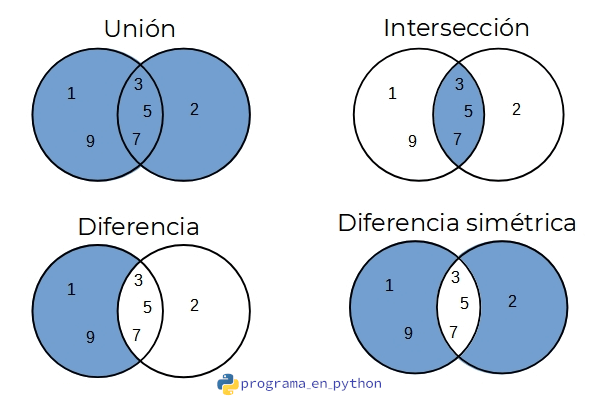

simbolo	nombre
|	    Unión
&	    Intersección
-	    Diferencia
^	    Diferencia simétrica

In [21]:
#Union
#Resultado de combinar ambos sets
my_set = {1,2,3,4,5}
my_set2 = {5,6,7,8}
my_set3 = my_set | my_set2
print(my_set3)

{1, 2, 3, 4, 5, 6, 7, 8}


In [22]:
#Interseccion
#Resultado de combinar ambos sets pero quedarme solo con los elementos que tienen en comun
my_set4 = my_set & my_set2
print(my_set4)

{5}


In [24]:
#Diferencia
#Tomar dos sets y de uno quitar todos los elementos que tiene del otro
my_set5 = my_set - my_set2
print(my_set5)

my_set6 = my_set2 - my_set
print(my_set6)

{1, 2, 3, 4}
{8, 6, 7}


In [25]:
#Diferencia simétrica
#Es el resultado de quedarme con ambos sets pero sin los elementos que comparten
my_set7 = my_set ^ my_set2
print(my_set7)


{1, 2, 3, 4, 6, 7, 8}


In [2]:
### Eliminando duplicados de una lista

def remove_duplicates(some_list):
    without_duplicates = []
    for element in some_list:
        if element not in without_duplicates:
            without_duplicates.append(element)
    return without_duplicates

def run():
    random_list = [1, 1, 2, 2, 4]
    print(remove_duplicates(random_list))


if __name__ == '__main__':
    run()

[1, 2, 4]


In [3]:
#eliminando duplicados con sets

def remove_duplicates(some_list):
    without_duplicates = []
    for element in some_list:
        if element not in without_duplicates:
            without_duplicates.append(element)
    return without_duplicates

def remove_duplicates_with_sets(some_list):
    return list(set(some_list))

def run():
    random_list = [1, 2, 2, 2, 3, "Platzi", "Platzi", True, 4.6, False]
    print(remove_duplicates(random_list))


if __name__ == '__main__':
    run()

[1, 2, 3, 'Platzi', 4.6, False]


### Manejo de fechas

In [2]:
import datetime


In [3]:
#fecha y hora de este momento
my_time = datetime.datetime.now()
print(my_time)

2023-02-06 18:29:37.644625


In [4]:
#fecha de hoy
my_day = datetime.date.today()
print(my_day)

2023-02-06


In [5]:
#De un objeto de tipo today puedo acceder a año, mes y día
print(f'Year: {my_day.year}')
print(f'Month: {my_day.month}')
print(f'Day: {my_day.day}')

Year: 2023
Month: 2
Day: 6


### Formateo de fechas
mm/dd/yyyy

dd/mm/yyyy

**Tabla de códigos de formato**

Format	Date
%Y	    Year
%m	    Month
%d	    Day
%H	    Hour
%M	    Minute
%S	    Second

In [10]:
from datetime import datetime

my_datetime =datetime.now()
print(my_datetime)

my_str = my_datetime.strftime('%d/%m/%Y')
print(f'Formato LATAM: {my_str}')

my_str = my_datetime.strftime('%m/%d/%Y')
print(f'Formato USA: {my_str}')

my_str = my_datetime.strftime('Estamos en el año %Y')
print(f'Formato Random: {my_str}')

2023-02-06 18:56:12.076228
Formato LATAM: 06/02/2023
Formato USA: 02/06/2023
Formato Random: Estamos en el año 2023


Creo un objeto my_datetime que contiene la fecha y hora actual, a ese objeto le aplico el método string format time o strftime y le paso el formato en el que quiero convertir la fecha teniendo en cuenta la tabla de codigos de formato.

Si quieren aplicar Python para análisis de datos es fundamental que dominen el manejo de fechas la librería datetime tiene dos funciones muy utilizadas que me parece importante ver
1- timedelta: retorna un delta de tiempo, es de ayuda en situaciones donde necesitamos restar o sumar por ej 1 día a cada fecha o 20 minutos cada fecha hora

2- strptime: recibe un str y retorna un objeto datetime, esto lo podeos usar para validar formatos de fecha capturando u ValueError cuando estos trabajando con archivos y queremos validar formatos de fechas con simple lambda podemos aplicar formato a todo el dataset y capturas los erros antes de operar con ellos o guardar en la db

Ejemplos aplicado

In [7]:
delta = datetime.timedelta(minutes=20)
    #si no se cumple con el formato lanzara un ValueError
fecha_hora = datetime.datetime.strptime('2021-09-29 21:30:00' , '%Y-%m-%d %H:%M:%S' )
resultato_delta = fecha_hora+delta
print(resultato_delta)

2021-09-29 21:50:00


### Time zones

En cada pais del mundo la hora es diferente

Para esto se usa el modulo pytz que debe instalarse con pip porque no viene de fabrica con python

se instala dentro del entorno que hayamos creado
avenv
pip install pytz

De esta lista se sacan las zonas en las que quiero saber la hora

https://en.wikipedia.org/wiki/List_of_tz_database_time_zones


In [ ]:
from datetime import datetime
import pytz

bogota_timezone = pytz.timezone("America/Bogota")
bogota_date = datetime.now(bogota_timezone)
print("Bogota:  ", bogota_date.strftime("%d/%m/%Y, %H:%M:%S"))